# Car detection MOdel

In [1]:
import geoai

In [2]:
raster_url = (
    "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/cars_7cm.tif"
)

In [3]:
raster_path = geoai.download_file(raster_url)

cars_7cm.tif: 100%|██████████| 92.0M/92.0M [00:54<00:00, 1.76MB/s]


# Visualize the dowloaded image.

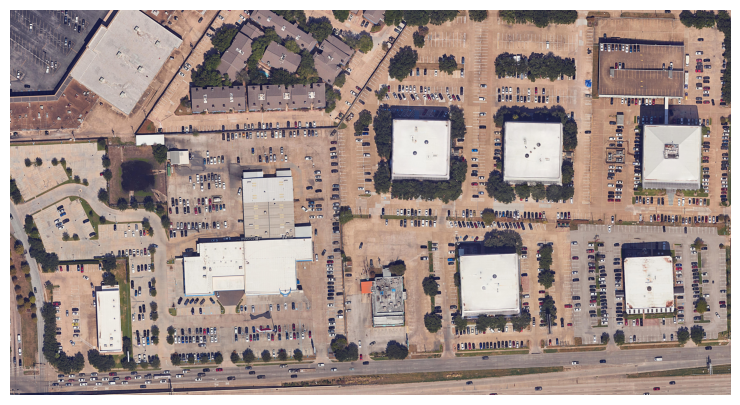

In [5]:
geoai.view_image(raster_path)

In [6]:
geoai.view_raster(raster_path)

# NOw lets initiate the Model

In [7]:
detector = geoai.CarDetector()

Model path not specified, downloading from Hugging Face...


car_detection_usa.pth:   0%|          | 0.00/176M [00:00<?, ?B/s]

Model downloaded to: C:\Users\Administrator\.cache\huggingface\hub\models--giswqs--geoai\snapshots\75788bf6253e967a91b9576b1620949a3b939820\car_detection_usa.pth
Model loaded successfully


In [8]:
mask_path = detector.generate_masks(
    raster_path = raster_path,
    output_path='car_masks.tif',
    confidence_threshold=0.5,
    mask_threshold=0.7,
    overlap=0.25,
    chip_size = (400,400),
)

Dataset initialized with 15 rows and 28 columns of chips
Image dimensions: 8351 x 4463 pixels
Chip size: 400 x 400 pixels
Overlap: 25.0% (stride_x=300, stride_y=300)
CRS: EPSG:3857
Processing raster with 105 batches


100%|██████████| 105/105 [01:14<00:00,  1.41it/s]


Masks with confidence values saved to car_masks.tif


# Convert the Masks to Polygons and save as geojson file

In [42]:
gdf = detector.vectorize_masks(
    masks_path=mask_path,
    output_path='car_masks.geojson',
    min_object_area=100,
    max_object_area=None,
)

Processing masks from: car_masks.tif
Found 1028 connected components
Using single-threaded processing, you can speed up processing by setting n_workers > 1


Processing components: 100%|██████████| 1028/1028 [01:54<00:00,  8.97it/s]


Saved 1021 objects with confidence to car_masks.geojson
Total processing time: 115.01 seconds


In [43]:
len(gdf)

1021

In [46]:
gdf=geoai.add_geometric_properties(gdf)
#gdf.head()

# Visualize the initial results

In [47]:
geoai.view_vector_interactive(gdf,column = 'confidence', tiles = raster_url)

# Filtering Cars by Area

In [48]:
#gdf_filter = gdf[(gdf["area_m2"]>8 ) & (gdf["minor_length_m"]>1)]

gdf_filter = gdf[
    (gdf["area_m2"] > 8) & (gdf["area_m2"] < 60) & (gdf["minor_length_m"] > 1)
]

In [49]:
len(gdf_filter)

967

# Visualize Final Results

In [50]:
geoai.view_vector_interactive(gdf_filter,column = 'confidence', tiles = raster_url
                              )